哈摟，各位資料科學家大家好，我是來自於台北市"頭期款不足"的阿宏，我想買房子很久了，但是不知道要買哪個地方，想先從內政部不動產交易時價登入資料中先了解行情，我現在手邊蒐集了台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)共四份資料，請各位資料科學家幫幫忙分析了。

# 1.不動產資料檔案讀取並串接

資料分散在4個資料，先合併成一個資料方便後續分析，但是我發現有英文欄位跟中文欄位，留下中文刪除英文，並加入新的欄位用以分辨台北市Taipei、新北市New_Taipei、台中市Taichung、高雄市Kaohsiung

1. 利用Pandas中的pd.read_csv()分別讀取A_lvr_land_A.csv、B_lvr_land_A.csv、E_lvr_land_A.csv、F_lvr_land_A.csv
2. 刪除csv中第二列英文翻譯，The villages and towns urban district,transaction sign,land sector position building sector house number plate,land shifting total area square meter,....
3. 生成city欄位其中以地區分類台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)
4. 將以上四份資料運用pd.concat()串接

In [1]:
import os
import pandas as pd 

In [2]:
#1.利用Pandas中的pd.read_csv()分別讀取A_lvr_land_A.csv、B_lvr_land_A.csv、E_lvr_land_A.csv、F_lvr_land_A.csv
#2.刪除csv中第二列英文翻譯，The villages and towns urban district,transaction sign,land sector position building sector house number plate,land shifting total area square meter,....

path = '/Users/becca/Desktop/'
desktop = os.listdir(path)
Taipei = pd.read_csv(path+'A_lvr_land_A.csv', skiprows=[1,2])
New_Taipei = pd.read_csv(path+'F_lvr_land_A.csv', skiprows=[1,2])
Taichung = pd.read_csv(path+'B_lvr_land_A.csv', skiprows=[1,2])
Kaohsiung = pd.read_csv(path+'E_lvr_land_A.csv', skiprows=[1,2])

In [3]:
#3. 生成city欄位其中以地區分類台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)

# Taipei['city'] = 'Taipei'
for i, j in zip([Taipei, New_Taipei, Taichung, Kaohsiung], ['Taipei','New_Taipei','Taichung','Kaohsung']):
    i['city'] = j

In [4]:
#4. 將以上四份資料運用pd.concat()串接
df = pd.concat([Taipei, New_Taipei, Taichung, Kaohsiung])
df.city

0          Taipei
1          Taipei
2          Taipei
3          Taipei
4          Taipei
           ...   
14127    Kaohsung
14128    Kaohsung
14129    Kaohsung
14130    Kaohsung
14131    Kaohsung
Name: city, Length: 59472, dtype: object

In [5]:
len(df.columns)

33

# 2. 資料清理與切片

因為我是想買來住的房子，所以幫忙刪除住宿用途以外的資料，並且限制
1. 交易年月日，限制在109年
2. 建物現況格局-房，1~5間 
3. 建物現況格局-廳，1~2廳

以下columns_mapping、analysis_columns、columns_type提供給資料科學家配合使用
1. 利用.rename()並配合以下columns_mapping，將原中文欄位名稱改為英文方便之後分析
2. 取出主要用途(main_use)為'住家用'以及都市土地使用分區(use_zoning)為'住'的資料並針對以下欄位analysis_columns做分析並去除na值
   (提示:先取完之後再.dropna())
3. 觀察欄位資料型態，並利用.astype()搭配以下提供的columns_type做欄位型態轉換
4. 做資料切片將<br>
    新增欄位交易年月日(tx_dt_year)，從交易年月日(tx_dt)萃取出年份<br>
    1.交易年月日(tx_dt_year)，限制在109年<br>
    2.建物現況格局-房(room_number)，限制在1到5間<br>
    3.建物現況格局-廳(hall_number)，限制在1到2廳<br>
    4.最後運用.reset_index()重新定義索引

In [6]:
columns_mapping = {'鄉鎮市區':'towns',
'交易標的':'transaction_sign',
'土地區段位置建物區段門牌':'house_number',
'土地移轉總面積平方公尺':'land_area_square_meter', 
'都市土地使用分區':'use_zoning', 
'非都市土地使用分區':'land_use_district',
'非都市土地使用編定':'land_use',
'交易年月日':'tx_dt', 
 '交易筆棟數':'transaction_pen_number', 
 '移轉層次':'shifting_level', 
 '總樓層數':'total_floor_number', 
 '建物型態':'building_state', 
 '主要用途':'main_use', 
 '主要建材':'main_materials',
 '建築完成年月':'complete_date', 
 '建物移轉總面積平方公尺':'building_area_square_meter', 
 '建物現況格局-房':'room_number', 
 '建物現況格局-廳':'hall_number', 
 '建物現況格局-衛':'health_number', 
'建物現況格局-隔間':'compartmented_number', 
 '有無管理組織':'manages', 
 '總價元':'total_price', 
 '單價元平方公尺':'unit_price', 
 '車位類別':'berth_category', 
 '車位移轉總面積(平方公尺)':'berth_area_square_meter',
'車位總價元':'berth_price', 
 '備註':'note', 
 '編號':'serial_number', 
 '主建物面積':'main_building_area', 
 '附屬建物面積':'auxiliary_building_area', 
 '陽台面積':'balcony_area', 
 '電梯':'elevator'
                  }
analysis_columns = ['city','towns','main_use','use_zoning','total_price','building_area_square_meter',
                                     'main_building_area',
                                     'tx_dt','unit_price','room_number','hall_number','health_number']
columns_type = {'total_price': 'int','unit_price':'float','building_area_square_meter':'float',
                                      'main_building_area': 'float',
                                      'room_number': 'int','hall_number': 'int','health_number': 'int'}

In [7]:
#1. 利用.rename()並配合以下columns_mapping，將原中文欄位名稱改為英文方便之後分析
df = df.rename(mapper = columns_mapping, axis=1)

In [8]:
#2. 取出主要用途(main_use)為'住家用'以及都市土地使用分區(use_zoning)為'住'的資料並針對以下欄位analysis_columns做分析並去除na值 
#   (提示:先取完之後再.dropna())

df = df.loc[df['main_use']=='住家用'] 
df = df.loc[df['use_zoning']=='住']
df = df[analysis_columns].dropna().reset_index(drop=True)

In [9]:
#3. 觀察欄位資料型態，並利用.astype()搭配以下提供的columns_type做欄位型態轉換
for i in columns_type:
    df[i] = df[i].astype(columns_type[i])
df.dtypes

city                           object
towns                          object
main_use                       object
use_zoning                     object
total_price                     int64
building_area_square_meter    float64
main_building_area            float64
tx_dt                           int64
unit_price                    float64
room_number                     int64
hall_number                     int64
health_number                   int64
dtype: object

In [10]:
df.columns

Index(['city', 'towns', 'main_use', 'use_zoning', 'total_price',
       'building_area_square_meter', 'main_building_area', 'tx_dt',
       'unit_price', 'room_number', 'hall_number', 'health_number'],
      dtype='object')

In [11]:
#4. 做資料切片將
#     新增欄位交易年月日(tx_dt_year)，從交易年月日(tx_dt)萃取出年份
#     1.交易年月日(tx_dt_year)，限制在109年
#     2.建物現況格局-房(room_number)，限制在1到5間
#     3.建物現況格局-廳(hall_number)，限制在1到2廳
#     4.最後運用.reset_index()重新定義索引

df['tx_dt_year']=0
for i in range(len(df)):
    df['tx_dt_year'][i] = int(str(df.tx_dt[i])[:3])
df = df.loc[(df['tx_dt_year']=='109') & 
            (5>=df['room_number']) | (df['room_number']>=1) & 
            (2>=df['hall_number']) | (df['hall_number']>=1)]
df = df.reset_index(drop=True)

/Users/becca/anaconda3/envs/PS/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [12]:
df

,city,towns,main_use,use_zoning,total_price,building_area_square_meter,main_building_area,tx_dt,unit_price,room_number,hall_number,health_number,tx_dt_year
0,Taipei,文山區,住家用,住,5580000,37.31,24.58,1090317,149558.0,2,1,1,109
1,Taipei,文山區,住家用,住,18280000,123.66,98.74,1090328,147825.0,3,2,2,109
2,Taipei,文山區,住家用,住,8000000,124.25,90.78,1090417,64386.0,3,1,2,109
3,Taipei,文山區,住家用,住,2200000,30.16,26.15,1090417,72944.0,5,2,2,109
4,Taipei,文山區,住家用,住,12000000,106.36,42.19,1090419,150473.0,2,2,1,109
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7637,Kaohsung,路竹區,住家用,住,5300000,140.11,86.24,1090718,37827.0,3,2,2,109
7638,Kaohsung,路竹區,住家用,住,5050000,144.76,101.76,1090802,34885.0,3,2,2,109
7639,Kaohsung,茄萣區,住家用,住,2720000,210.78,144.40,1090725,12904.0,5,2,3,109
7640,Kaohsung,路竹區,住家用,住,4950000,94.48,94.48,1090726,52392.0,3,2,2,109


# 3. 建立自定義特徵加入分析


以台灣來說大家都是以坪為單位計算使用面積，應該是不會問說你家有幾平方公尺吧?，但是偏偏資料中沒有以坪為單位計算，所以接下來請各位幫忙產生新的欄位以坪為單位計算面積，轉換公式我也幫你找好了，在下面的定義。<br>
定義 : 1平方公尺相當於0.3025坪 <br>
建立新特徵
1. 建物移轉總面積坪(building_area_square_feet) : 建物移轉總面積平方公尺\*0.3025
2. 主建物面積坪(main_building_area_square_feet) : 主建物面積\*0.3025
3. 單價元坪(unit_price_square_feet) : 單價元平方公尺/0.3025

可以利用.describe()做一下資料觀察，是否有奇怪的資料?<br>
如果有請將資料移除，並說明為什麼移除此資料?<br>
移除後再用.describe()觀察是否還有奇怪的資料?

In [13]:
# 建立新特徵
# 1. 建物移轉總面積坪(building_area_square_feet) : 建物移轉總面積平方公尺*0.3025
# 2. 主建物面積坪(main_building_area_square_feet) : 主建物面積*0.3025
# 3. 單價元坪(unit_price_square_feet) : 單價元平方公尺/0.3025
df['building_area_square_feet'] = df['building_area_square_meter']*0.3025
df['main_building_area_square_feet'] = df['main_building_area']*0.3025
df['unit_price_square_feet'] = df['unit_price']/0.3025

In [14]:
# 可以利用.describe()做一下資料觀察，是否有奇怪的資料?
# 如果有請將資料移除，並說明為什麼移除此資料?
df.describe()
#有，主建物面積坪、建物移轉總面積坪為0的資料

,total_price,building_area_square_meter,main_building_area,tx_dt,unit_price,room_number,hall_number,health_number,tx_dt_year,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
count,7.642000e+03,7642.000000,7642.000000,7.642000e+03,7642.000000,7642.000000,7642.000000,7642.000000,7642.000000,7642.000000,7642.000000,7.642000e+03
mean,1.174300e+07,123.665824,84.894704,1.090242e+06,95259.023685,2.965977,1.787098,1.876341,109.093954,37.408912,25.680648,3.149059e+05
std,1.265232e+07,69.136032,45.046909,2.498773e+03,59732.220698,1.400224,0.653643,1.270823,10.080714,20.913650,13.626690,1.974619e+05
min,0.000000e+00,0.970000,0.000000,9.906010e+05,0.000000,0.000000,0.000000,0.000000,102.000000,0.293425,0.000000,0.000000e+00
25%,5.550000e+06,82.500000,60.640000,1.090415e+06,53604.000000,2.000000,2.000000,1.000000,109.000000,24.956250,18.343600,1.772033e+05
50%,8.600000e+06,109.210000,79.745000,1.090502e+06,79632.500000,3.000000,2.000000,2.000000,109.000000,33.036025,24.122862,2.632479e+05
75%,1.350000e+07,150.245000,98.310000,1.090517e+06,119201.000000,3.000000,2.000000,2.000000,109.000000,45.449112,29.738775,3.940529e+05
max,2.250000e+08,1444.950000,910.920000,1.090802e+06,610104.000000,65.000000,21.000000,66.000000,990.000000,437.097375,275.553300,2.016873e+06


In [15]:
df = df.reset_index(drop=True)

In [16]:
pop=[]
for i in df.columns:
    for j in range(len(df)):
        if df[i][j] == 0:
            pop.append(j)
df = df.drop(pop).reset_index(drop=True)

In [17]:
df

,city,towns,main_use,use_zoning,total_price,building_area_square_meter,main_building_area,tx_dt,unit_price,room_number,hall_number,health_number,tx_dt_year,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
0,Taipei,文山區,住家用,住,5580000,37.31,24.58,1090317,149558.0,2,1,1,109,11.286275,7.435450,494406.611570
1,Taipei,文山區,住家用,住,18280000,123.66,98.74,1090328,147825.0,3,2,2,109,37.407150,29.868850,488677.685950
2,Taipei,文山區,住家用,住,8000000,124.25,90.78,1090417,64386.0,3,1,2,109,37.585625,27.460950,212846.280992
3,Taipei,文山區,住家用,住,2200000,30.16,26.15,1090417,72944.0,5,2,2,109,9.123400,7.910375,241137.190083
4,Taipei,文山區,住家用,住,12000000,106.36,42.19,1090419,150473.0,2,2,1,109,32.173900,12.762475,497431.404959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7297,Kaohsung,路竹區,住家用,住,13000000,214.28,202.04,1090518,60668.0,4,3,4,109,64.819700,61.117100,200555.371901
7298,Kaohsung,路竹區,住家用,住,5300000,140.11,86.24,1090718,37827.0,3,2,2,109,42.383275,26.087600,125047.933884
7299,Kaohsung,路竹區,住家用,住,5050000,144.76,101.76,1090802,34885.0,3,2,2,109,43.789900,30.782400,115322.314050
7300,Kaohsung,茄萣區,住家用,住,2720000,210.78,144.40,1090725,12904.0,5,2,3,109,63.760950,43.681000,42657.851240


In [18]:
# 移除後再用.describe()觀察是否還有奇怪的資料?
df.describe()

,total_price,building_area_square_meter,main_building_area,tx_dt,unit_price,room_number,hall_number,health_number,tx_dt_year,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
count,7.302000e+03,7302.000000,7302.000000,7.302000e+03,7302.000000,7302.000000,7302.000000,7302.000000,7302.000000,7302.000000,7302.000000,7.302000e+03
mean,1.192005e+07,125.472964,86.374082,1.090235e+06,95335.058751,2.970556,1.851274,1.833881,109.098740,37.955571,26.128160,3.151572e+05
std,1.278688e+07,68.539224,43.808644,2.548979e+03,59583.128096,1.296940,0.570767,1.138865,10.312723,20.733115,13.252115,1.969690e+05
min,4.100000e+05,7.440000,7.440000,9.906010e+05,3239.000000,1.000000,1.000000,1.000000,102.000000,2.250600,2.250600,1.070744e+04
25%,5.720000e+06,83.920000,62.272500,1.090415e+06,53625.500000,2.000000,2.000000,1.000000,109.000000,25.385800,18.837431,1.772744e+05
50%,8.800000e+06,110.535000,80.390000,1.090502e+06,80005.500000,3.000000,2.000000,2.000000,109.000000,33.436837,24.317975,2.644810e+05
75%,1.369500e+07,152.027500,98.925000,1.090517e+06,119458.250000,3.000000,2.000000,2.000000,109.000000,45.988319,29.924813,3.949033e+05
max,2.250000e+08,1444.950000,910.920000,1.090802e+06,610104.000000,65.000000,21.000000,66.000000,990.000000,437.097375,275.553300,2.016873e+06


# 4. 找出台北市時價登入總價高度相關的變數

阿宏我是台北人他想找出影響台北市總價、單價元坪的因子<br>
相關係數0.3以下為低相關，0.3\~0.7為中等相關，0.7以上為高度相關<br>
1. 資料切片切出city欄位為台北市的資料，並找出時價登入總價(total_price)高度相關的變數
2. 資料切片切出city欄位為台北市的資料，找出單價元坪(unit_price_square_feet)高度相關的變數

In [19]:
# 阿宏我是台北人他想找出影響台北市總價、單價元坪的因子
# 1. 資料切片切出city欄位為台北市的資料，並找出時價登入總價(total_price)高度相關的變數
tp = df.loc[df.city=='Taipei'].corr(method='pearson').total_price
print('# total_price with ...')
for i, j in zip(tp.keys(), tp):
    if abs(j) >= 0.7:
        print('%s = %.4f' %(i, j))

# 2. 資料切片切出city欄位為台北市的資料，找出單價元坪(unit_price_square_feet)高度相關的變數
sq = df.loc[df.city=='Taipei'].corr(method='pearson').unit_price_square_feet
print('\n# unit_price_square_feet with ...')
for i, j in zip(sq.keys(), sq):
    if abs(j) >= 0.7:
        print('%s = %.4f' %(i, j))

# total_price with ...
total_price = 1.0000
building_area_square_meter = 0.8805
main_building_area = 0.7282
building_area_square_feet = 0.8805
main_building_area_square_feet = 0.7282

# unit_price_square_feet with ...
unit_price = 1.0000
unit_price_square_feet = 1.0000


# 5. 資料視覺化並解釋


我想要以視覺化的方式來看房價資料，並且請各位資料科學家解釋圖表給阿宏我知道
1. 以城市(city)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區
2. 進一步對台北市的資料做圖，以建物現況格局-房(room_number)為x軸，以總價元(total_price)為y軸畫出boxplot，並找出總價元(total_price)中位數最高的房間數。hint:資料切片找出city欄位為台北市的資料，再進一步畫圖
3. 對台北市的資料做圖，先將地區(twons)做編碼在進行，再以地區(twon)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區。hint:運用LabelEncoder()對地區(twons)做編碼，運用.inverse_transform()反查編碼的地區

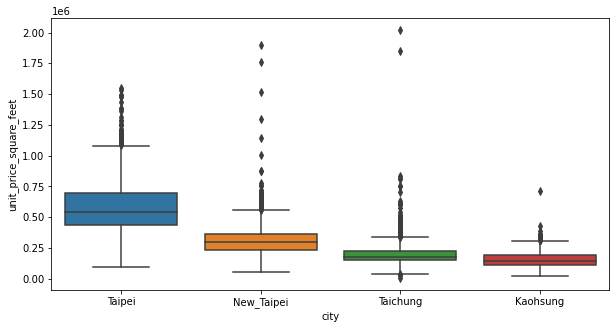

Thus, the highest mode of unit price square feet happen in "Taipei"


In [20]:
#1. 以城市(city)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，
#並找出單價元坪(unit_price_square_feet)中位數最高的地區

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=[10,5])
sns.boxplot(x='city', y='unit_price_square_feet', data= df)
plt.show()

print('Thus, the highest mode of unit price square feet happen in "Taipei"')

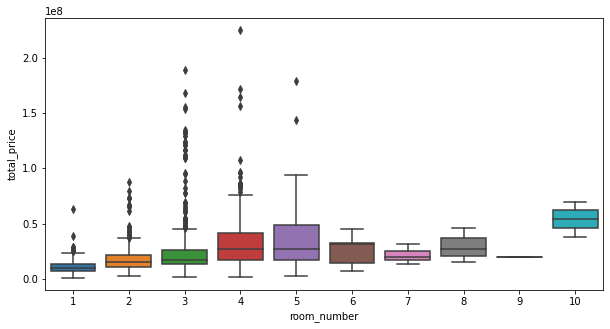

The room_number with the highest price is 10.


In [21]:
#2. 進一步對"台北市"的資料做圖，以建物現況格局-房(room_number)為x軸，以總價元(total_price)為y軸畫出boxplot，
#並找出總價元(total_price)中位數最高的房間數。hint:資料切片找出city欄位為台北市的資料，再進一步畫圖

d_taipei = df.loc[df['city']=='Taipei']
plt.figure(figsize=[10,5])
sns.boxplot(x='room_number', y='total_price', data= d_taipei)
plt.show()

print('The room_number with the highest price is 10.')

/Users/becca/anaconda3/envs/PS/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


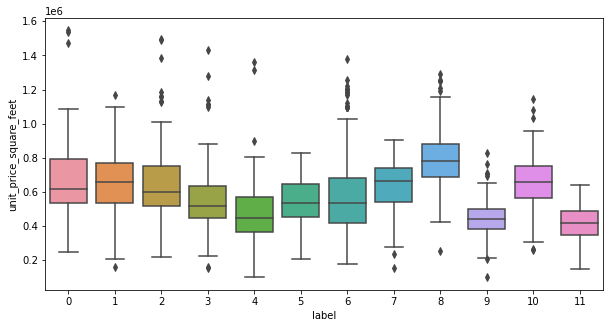

大安區 has the highest price mode.


In [22]:
#3. 對"台北市"的資料做圖，先將地區(twons)做編碼在進行，再以地區(twon)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，
#並找出單價元坪(unit_price_square_feet)中位數最高的地區。
# hint:運用LabelEncoder()對地區(twons)做編碼，運用.inverse_transform()反查編碼的地區

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
d_taipei['label'] = le.fit_transform(d_taipei['towns'])
plt.figure(figsize =[10,5])
sns.boxplot(x='label', y='unit_price_square_feet', data= d_taipei)
plt.show()

h_city = list(le.inverse_transform([8]))[0]
print('%s has the highest price mode.' %h_city)
